# Zomato Restaurant

# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

 


# Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name



The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
    
    
• Restaurant Name: Name of the restaurant
    
    
• Country Code: Country in which restaurant is located
    
    
• City: City in which restaurant is located
    
    
• Address: Address of the restaurant
    
    
• Locality: Location in the city
    
    
• Locality Verbose: Detailed description of the locality
    
    
• Longitude: Longitude coordinate of the restaurant&#39;s location
    
    
• Latitude: Latitude coordinate of the restaurant&#39;s location
    
    
• Cuisines: Cuisines offered by the restaurant
    
    
• Average Cost for two: Cost for two people in different currencies ��
    
    
• Currency: Currency of the country
    
    
• Has Table booking: yes/no
    
    
• Has Online delivery: yes/ no
    
    
• Is delivering: yes/ no
    
    
• Switch to order menu: yes/no
    
    
• Price range: range of price of food
    
    
• Aggregate Rating: Average rating out of 5
    
    
• Rating color: depending upon the average rating color
    
    
• Rating text: text on the basis of rating of rating
    
    
• Votes: Number of ratings casted by people


# Problem statement : 

In this dataset predict 2 things –
1) Average Cost for two

2) Price range



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df1 = pd.read_csv('zomato.csv',encoding='latin-1')


In [3]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,Istanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, Istanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,Istanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, Istanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Istanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, Istanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,Istanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, Istanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df1.shape

(9551, 21)

In [5]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df2 = pd.read_excel('Country-Code .xlsx')



In [7]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
df2.shape

(15, 2)

In [9]:
df2.columns

Index(['Country Code', 'Country'], dtype='object')

# Merging both dataset

In [10]:
df = df2.merge(df1, how='left')

In [11]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [12]:
df.shape

(9551, 22)

In [13]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

# Outcome

Object Data Type:

Restaurant Name, City, Address, Locality, Locality Verbose , Cuisines  ,Currency ,Has Table booking ,Has Online delivery ,Is delivering now 
Switch to order menu, Rating color, Rating text , Country 


Integer Data Type (int64):

Restaurant ID, Country Code, Average Cost for two, Price range, Votes 

Float Data Type (float64):
    
Longitude, Latitude, Aggregate rating

 Here are 14 columns with the object data type, 5 columns with the int64 data type, and 3 columns with the float64 data type.

In [15]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['Country Code', 'Restaurant ID', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text'],
      dtype='object')


In [16]:
# Checking for the missing values in the dataset

df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines have null value

# Handling Missing Value

In [17]:
df['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [18]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

No Null Value present

# drop columns which we wont be using for our data analysis

In [20]:
df.drop(columns=['Restaurant ID','Is delivering now'],inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant Name       9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [22]:
df.nunique()

Country Code              15
Country                   15
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

# Country Code

In [23]:
df['Country Code'].nunique()

15

In [24]:
print(df['Country Code'].value_counts())

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64


# Country

In [25]:
print(df['Country'].value_counts())

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


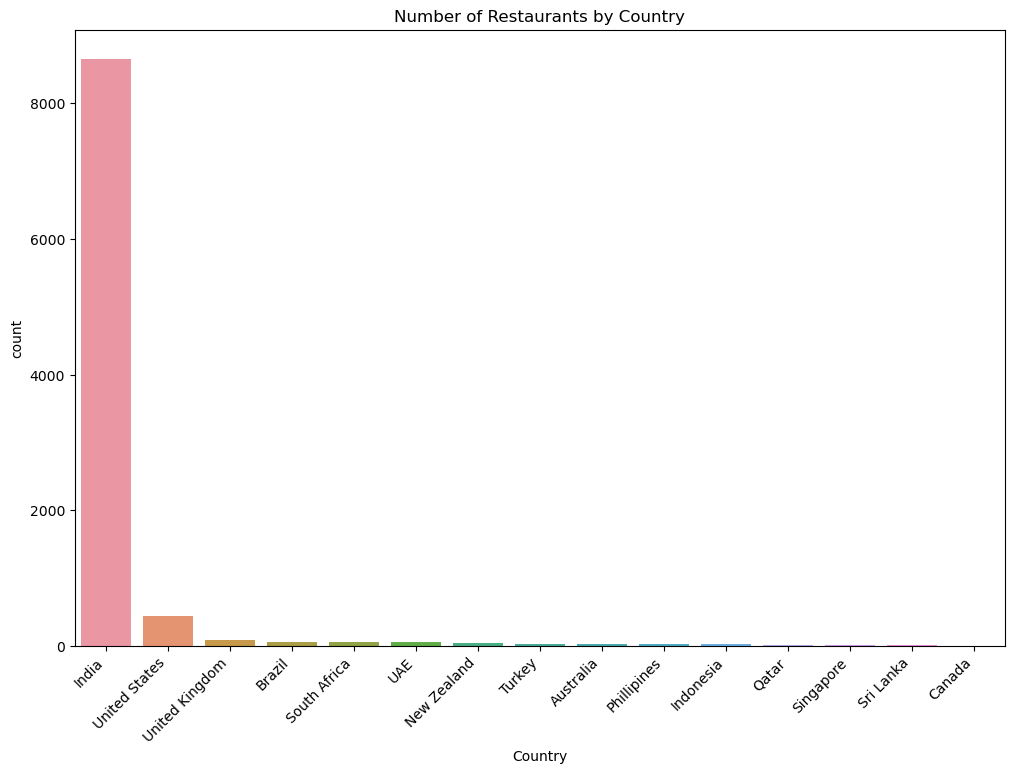

In [26]:
# Plot the count of restaurants by country
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Restaurants by Country')
plt.show()

India is highest in number for using zomato 

([<matplotlib.patches.Wedge at 0x1849268cca0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

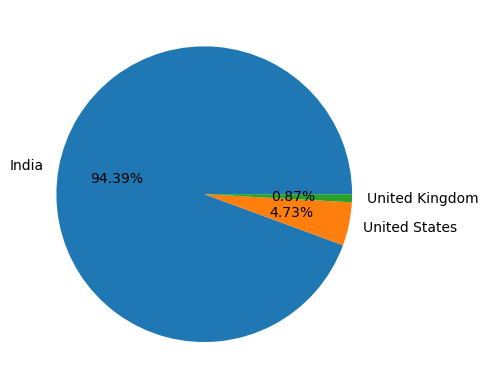

In [27]:
#pie chart to represent the country where zomato is widely used
plt.pie(df["Country"].value_counts().head(3),labels=df["Country"].value_counts().head(3).index,autopct="%1.2f%%")

India is widely used zomato. top 3 country using zomato is India.UK and US

# Currency

In [28]:
#currency
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


# City

In [29]:
df['City'].nunique()

141

In [30]:
print(df['City'].value_counts())

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64


In [31]:
df['Restaurant Name'].nunique()

7446

In [32]:
print(df['Restaurant Name'].value_counts())

Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: Restaurant Name, Length: 7446, dtype: int64


In [33]:
df.drop(columns=['Longitude', 'Latitude','Restaurant Name', 'Address', 'Locality', 'Locality Verbose'],inplace=True)

In [34]:
df.columns

Index(['Country Code', 'Country', 'City', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

# 'Has Table booking' Column

In [35]:
df['Has Table booking'].nunique()

2

In [36]:
print(df['Has Table booking'].value_counts())

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


label encoding

Text(0, 0.5, 'Number of Restaurants')

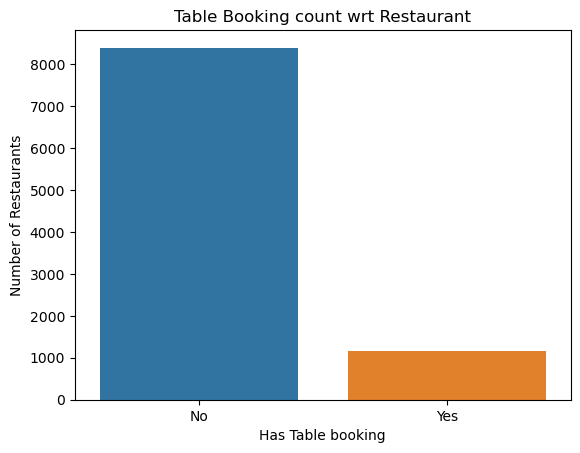

In [37]:
sns.countplot('Has Table booking',data=df);
plt.title('Table Booking count wrt Restaurant');
plt.ylabel('Number of Restaurants')

Seems there are lot of restaurants where we can't book a table

In [38]:
df= df.replace({"Has Table booking":{"No":0, "Yes":1 }})

# 'Has Online delivery' Column

In [39]:
df['Has Online delivery'].nunique()

2

In [40]:
print(df['Has Online delivery'].value_counts())

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


Text(0, 0.5, 'Number of Restaurants')

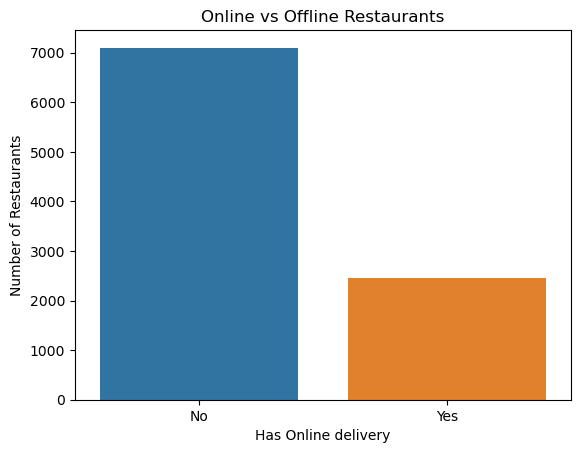

In [41]:
sns.countplot('Has Online delivery',data=df);
plt.title('Online vs Offline Restaurants');
plt.ylabel('Number of Restaurants')

showing less number of restaurant delievery online

In [42]:
#show how many country have online delive
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


# online Deliveries are available in India and UAE

In [43]:
#show how many country have online delive
df[['Has Online delivery','City']].groupby(['Has Online delivery','City']).size().reset_index()

,Has Online delivery,City,0
0,No,Abu Dhabi,9
1,No,Agra,20
2,No,Ahmedabad,10
3,No,Albany,20
4,No,Allahabad,20
...,...,...,...
157,Yes,New Delhi,1489
158,Yes,Noida,364
159,Yes,Pune,7
160,Yes,Secunderabad,1


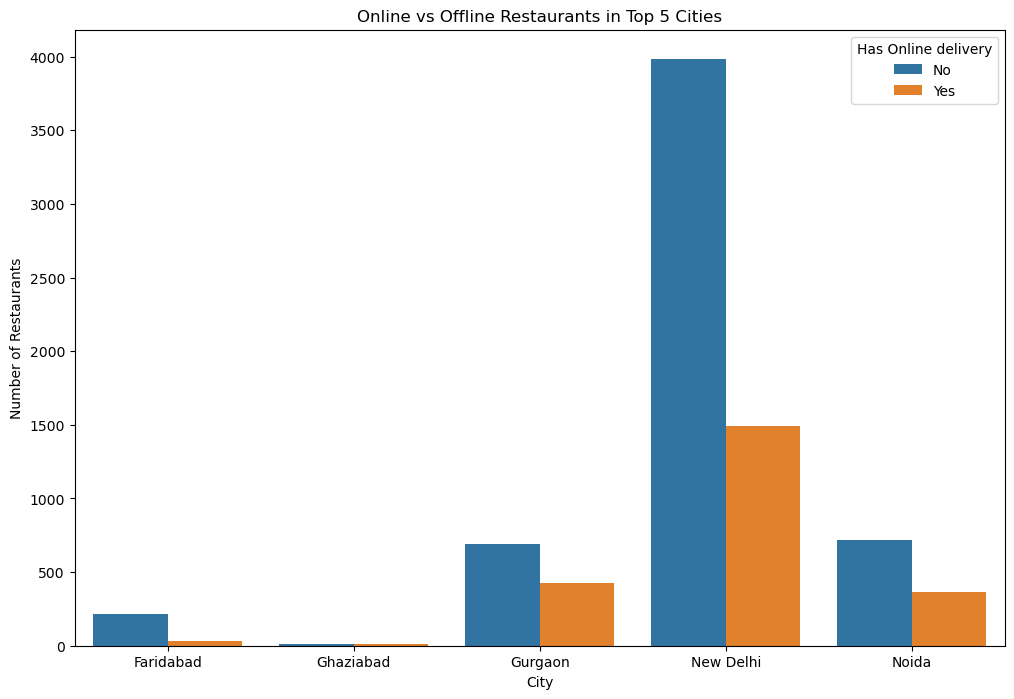

In [44]:
# Get the top 5 cities based on the number of restaurants
top_cities = df['City'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 cities
df_top5 = df[df['City'].isin(top_cities)]

# Plot countplot
plt.figure(figsize=(12, 8))
sns.countplot(x='City', hue='Has Online delivery', data=df_top5)
plt.title('Online vs Offline Restaurants in Top 5 Cities')
plt.ylabel('Number of Restaurants')
plt.show()

New Delhi,Noida,Guragaon city,Faridabad ,are top 5 city has more number of online Delivery.

 encode

In [45]:
df= df.replace({"Has Online delivery":{"No":0, "Yes":1 }})

# 'Switch to order menu' Column

In [46]:
df['Switch to order menu'].nunique()

1

In [47]:
print(df['Switch to order menu'].value_counts())

No    9551
Name: Switch to order menu, dtype: int64


In [48]:
#No need of Switch to order menu,delete
df.drop(columns=['Switch to order menu'],inplace=True)

# Ratings

In [49]:
#Rating
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [50]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


1.Excellent: Ratings between 4.5 to 4.9
    
    
2.Very Good: Ratings between 4.0 to 4.4
    
    
3.Good: Ratings between 3.5 to 3.9
    
    
4.Average: Ratings between 3.0 to 3.4
    
    
5.Poor: Ratings between 2.0 to 2.4

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

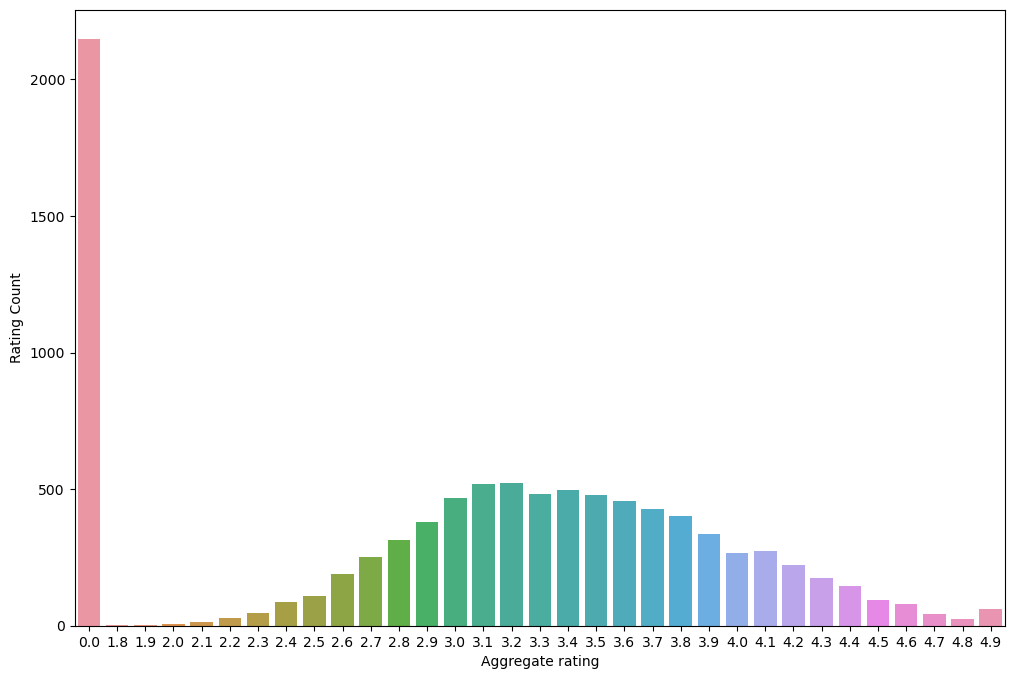

In [51]:
#Visualize
plt.figure(figsize=(12, 8))
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

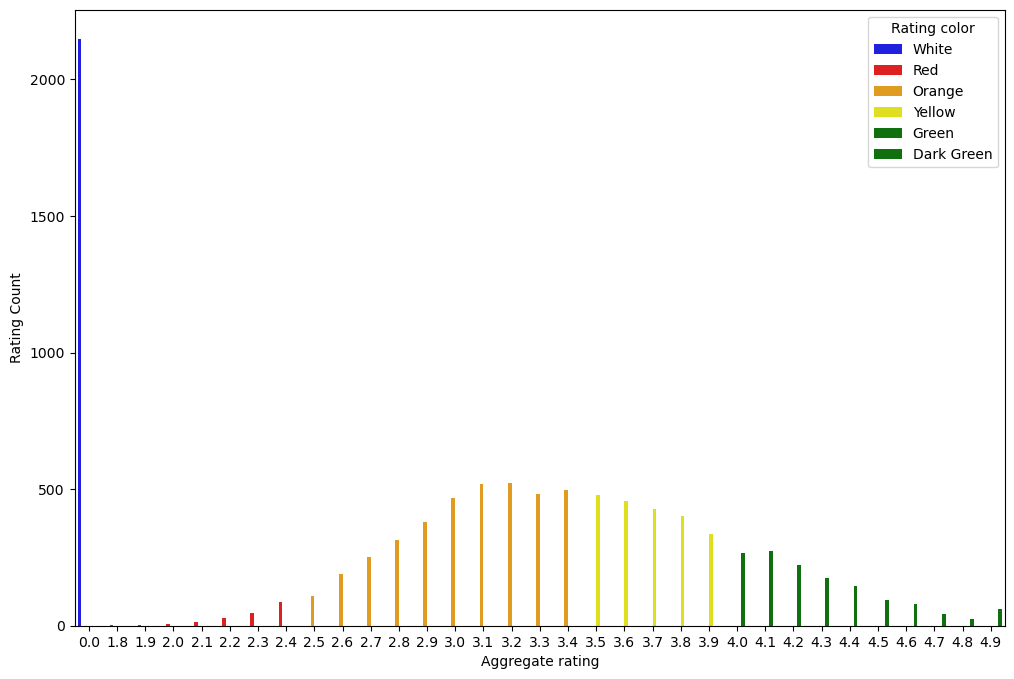

In [52]:
#Rating Colour,aggregate rating,rating count
plt.figure(figsize=(12, 8))
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])


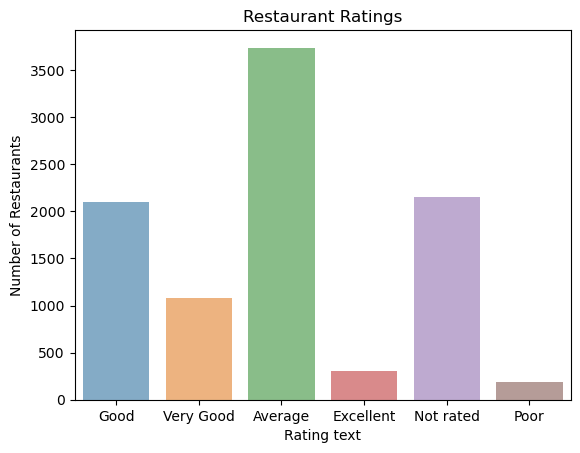

In [53]:
sns.countplot(df['Rating text'],alpha=0.6);
plt.title('Restaurant Ratings');
plt.ylabel('Number of Restaurants');


Observation:

1.Not Rated count is very high

2.Maximum number of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

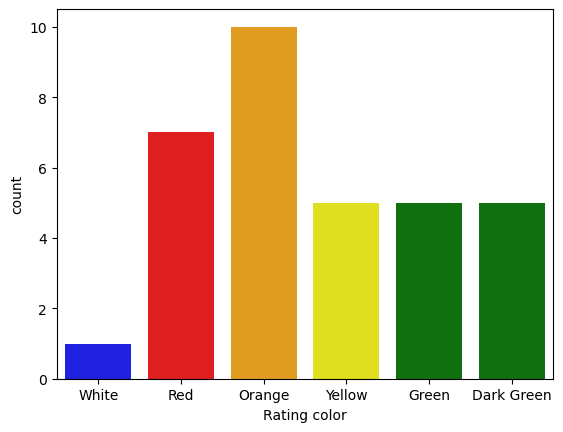

In [54]:
## Count plot for rating colour
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [55]:
# Find the countries name that has given 0 rating 
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [56]:
df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


India shows maximum number for unrated restaurant

In [57]:
df.columns


Index(['Country Code', 'Country', 'City', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

# Cousines

In [58]:
#the most famous and regularly ordered cuisines on zomato
df["Cuisines"].value_counts()

North Indian                                 945
North Indian, Chinese                        511
Fast Food                                    354
Chinese                                      354
North Indian, Mughlai                        334
                                            ... 
Cafe, Mexican, Continental                     1
North Indian, Continental, Asian, Italian      1
Continental, Cafe                              1
North Indian, Biryani, Mughlai                 1
Burger, Greek, Sandwich                        1
Name: Cuisines, Length: 1825, dtype: int64

In [59]:
#the most famous and regularly ordered cuisines on zomato
df["Cuisines"].value_counts()[:10]

North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Text(0, 0.5, 'Number of Restaurants')

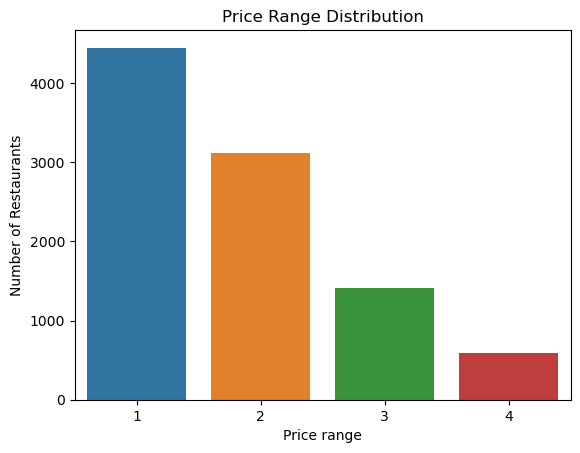

In [60]:
sns.countplot('Price range',data=df)
plt.title('Price Range Distribution');
plt.ylabel('Number of Restaurants')

Diffrent price range present.

# Average Cost for two

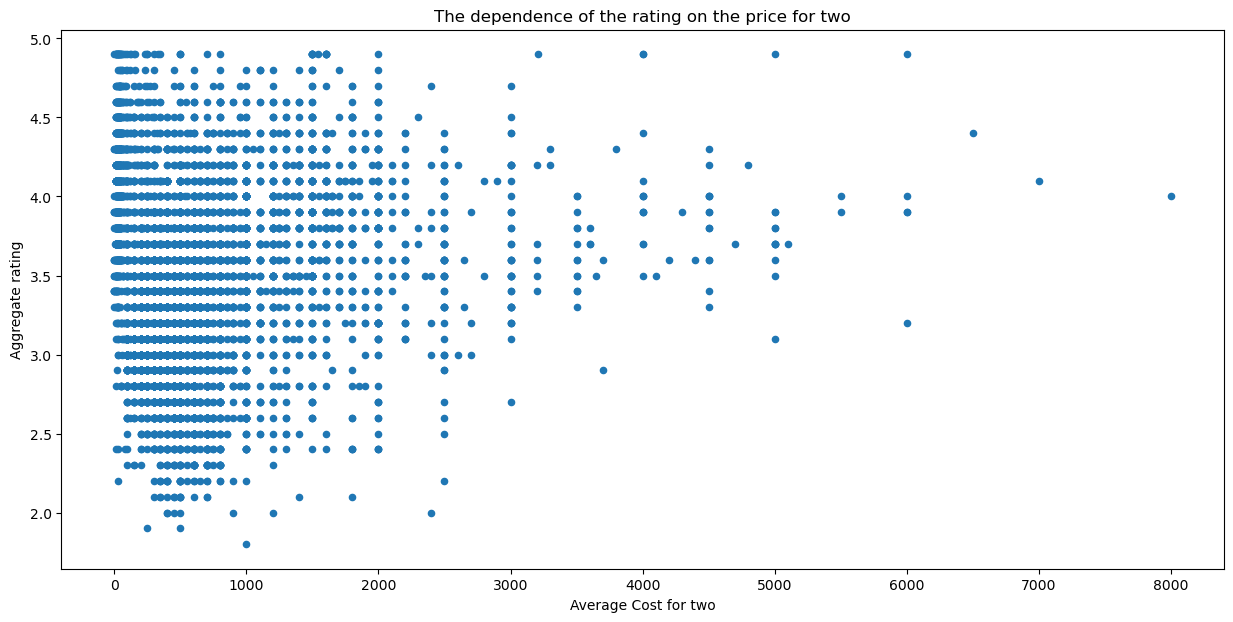

In [61]:
df[(df['Average Cost for two'] < 10000) & (df['Aggregate rating'] != 0)].plot.scatter(
    x='Average Cost for two', y='Aggregate rating', figsize=(15, 7), title="The dependence of the rating on the price for two"
)
plt.show()

The maximum number of restaurants falls in the 0 - 1000 price range and 2.5 to 4.0 rating.

# Pairplot

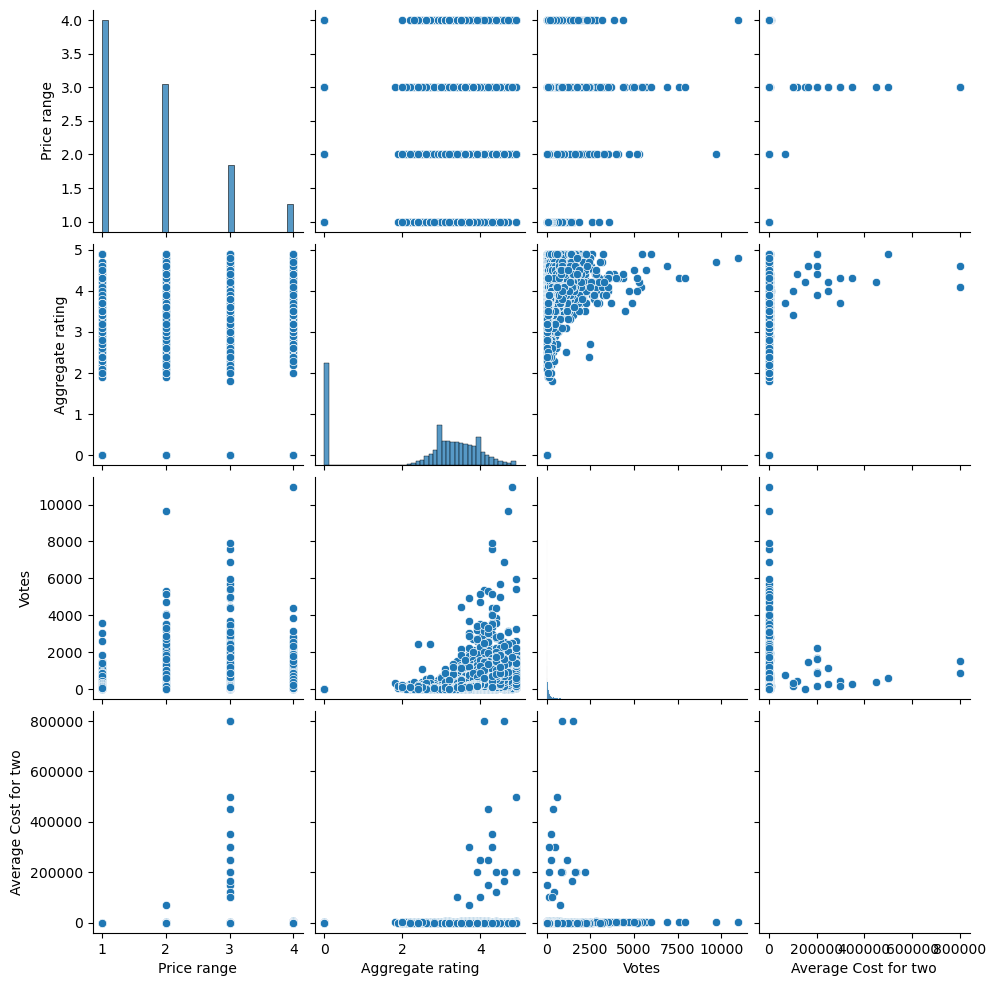

In [62]:
data= ['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']
sns.pairplot(df[data])
plt.show()

In [63]:
df.shape

(9551, 13)

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Cuisines              9551 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   int64  
 7   Has Online delivery   9551 non-null   int64  
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.3+ MB


# Label Encoder

In [65]:
cf = df.select_dtypes(include=[np.object]).columns
cf

Index(['Country', 'City', 'Cuisines', 'Currency', 'Rating color',
       'Rating text'],
      dtype='object')

In [66]:
# Columns to label encode
columns_to_encode = ['Country', 'City', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [67]:
df.dtypes

Country Code              int64
Country                   int32
City                      int32
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int64
Has Online delivery       int64
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

# Satistical Summary

In [68]:
df.describe()

,Country Code,Country,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,3.736781,78.954141,989.461732,1199.210763,3.977699,0.121244,0.256622,1.804837,2.666370,2.952885,1.788713,156.909748
std,56.750546,2.651963,23.464434,514.176108,16121.183073,0.914242,0.326428,0.436792,0.905609,1.516378,1.493048,1.694637,430.169145
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,77.000000,497.000000,250.000000,4.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000
50%,1.000000,3.000000,89.000000,1127.000000,400.000000,4.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.000000,3.000000,89.000000,1353.500000,700.000000,4.000000,0.000000,1.000000,2.000000,3.700000,4.000000,3.000000,131.000000
max,216.000000,14.000000,140.000000,1824.000000,800000.000000,11.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000


# Correlation

In [69]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,Country Code,Country,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,0.968700,-0.200695,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,0.243327,0.282189,-0.187174,0.222685,0.154530
Country,0.968700,1.000000,-0.196657,-0.127955,-0.004034,-0.105296,-0.062076,-0.140464,0.178035,0.255591,-0.155486,0.203846,0.155161
City,-0.200695,-0.196657,1.000000,0.026746,-0.027922,-0.111446,-0.001981,0.015779,-0.112941,-0.138622,0.117352,-0.103619,-0.087053
Cuisines,-0.132902,-0.127955,0.026746,1.000000,0.005831,0.068912,0.050639,-0.016639,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719
Average Cost for two,0.043225,-0.004034,-0.027922,0.005831,1.000000,0.045615,0.007758,-0.018974,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.033466,-0.105296,-0.111446,0.068912,0.045615,1.000000,0.000640,0.006991,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has Table booking,-0.061682,-0.062076,-0.001981,0.050639,0.007758,0.000640,1.000000,0.101224,0.501925,0.189998,-0.021365,0.044043,0.169422
Has Online delivery,-0.154605,-0.140464,0.015779,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.077918,0.225699,0.011477,-0.080937,0.074303
Price range,0.243327,0.178035,-0.112941,-0.005350,0.075083,0.075179,0.501925,0.077918,1.000000,0.437944,-0.140468,0.164242,0.309444
Aggregate rating,0.282189,0.255591,-0.138622,-0.080331,0.051792,-0.006939,0.189998,0.225699,0.437944,1.000000,-0.367054,-0.182662,0.313691


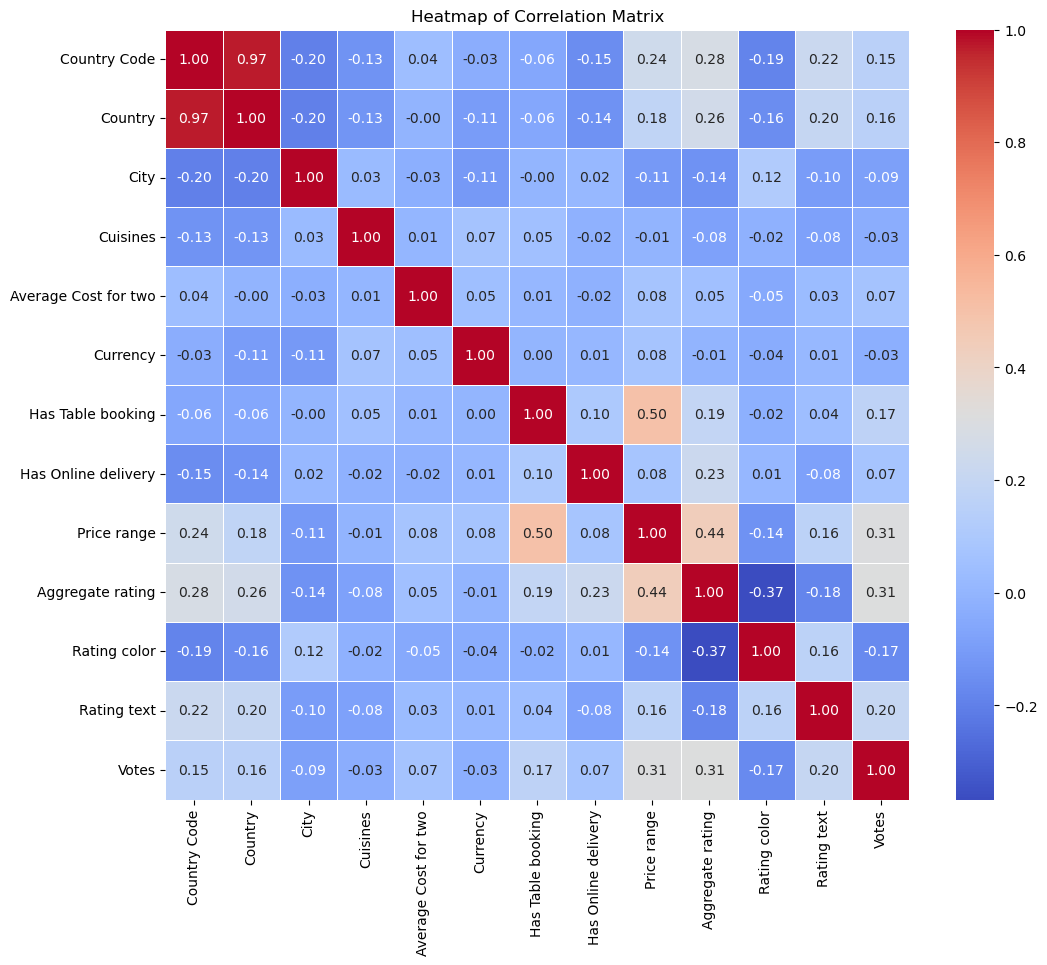

In [70]:
# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Check Outlier

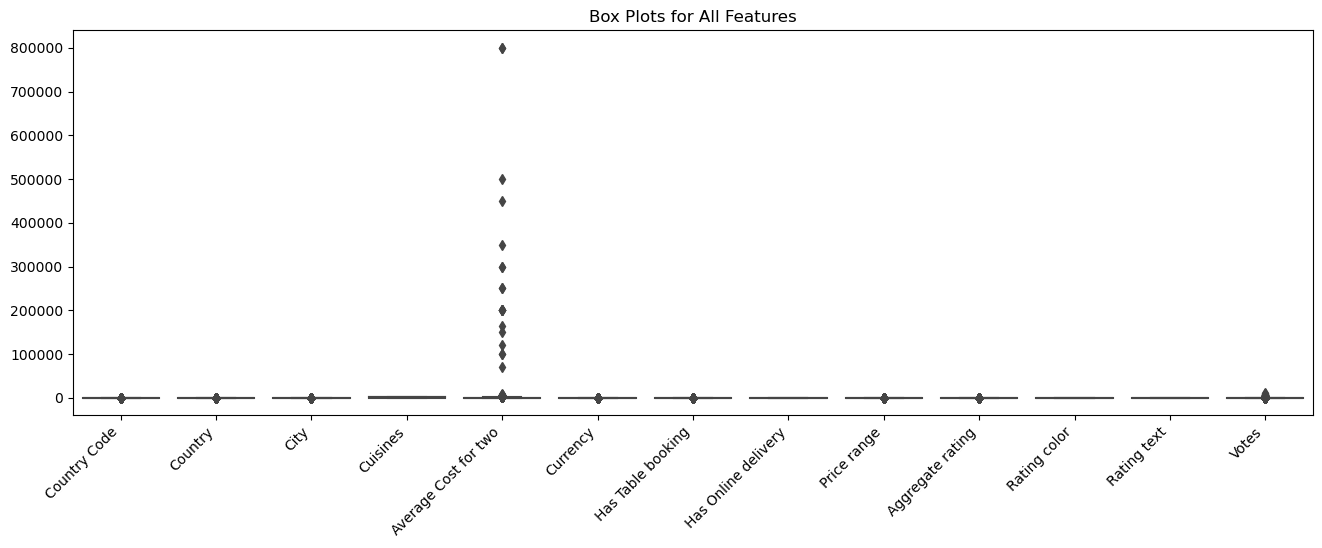

In [71]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=df)
plt.title("Box Plots for All Features")
plt.xticks(rotation=45, ha='right')
plt.show()

outlier preseent in Average cost of Two

Remove outlier using Zscore technique

In [72]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape
thershold = 3
print (np.where(z>3))

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64), array([2, 2, 2, ..., 1, 0, 1], dtype=int64))


In [73]:
df_new = df[(z<3).all(axis=1)]
print('The shape of original dataset is ',df.shape)
print('The shape of dataset after removing the outliers is ',df_new.shape)

The shape of original dataset is  (9551, 13)
The shape of dataset after removing the outliers is  (8508, 13)


In [74]:
#Percentage lost
loss_per = ((9551-8508)/18059)*100
print('data lost is ', loss_per,'%')

data lost is  5.775513594329698 %


# Check Skewness

In [75]:
df.skew()

Country Code             3.043965
Country                  3.312721
City                    -1.227225
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

outcome
1.Country Code: Right-skewed (positive skewness) with a skewness of 3.04.
    
2.Country: Right-skewed (positive skewness) with a skewness of 3.31.
    
3.City: Left-skewed (negative skewness) with a skewness of -1.23.
    
4.Cuisines: Left-skewed (negative skewness) with a skewness of -0.31.
    
5.Average Cost for Two: Right-skewed (positive skewness) with a skewness of 35.48.
    
6.Currency: Right-skewed (positive skewness) with a skewness of 2.86.
    
7.Has Table Booking: Right-skewed (positive skewness) with a skewness of 2.32.
    
8.Has Online Delivery: Right-skewed (positive skewness) with a skewness of 1.11.
    
9.Price Range: Right-skewed (positive skewness) with a skewness of 0.89.
    
10.Aggregate Rating: Left-skewed (negative skewness) with a skewness of -0.95.
    
11.Rating Color: Right-skewed (positive skewness) with a skewness of 0.05.
    
12.Rating Text: Right-skewed (positive skewness) with a skewness of 0.43.
    
13.Votes: Right-skewed (positive skewness) with a skewness of 8.81.

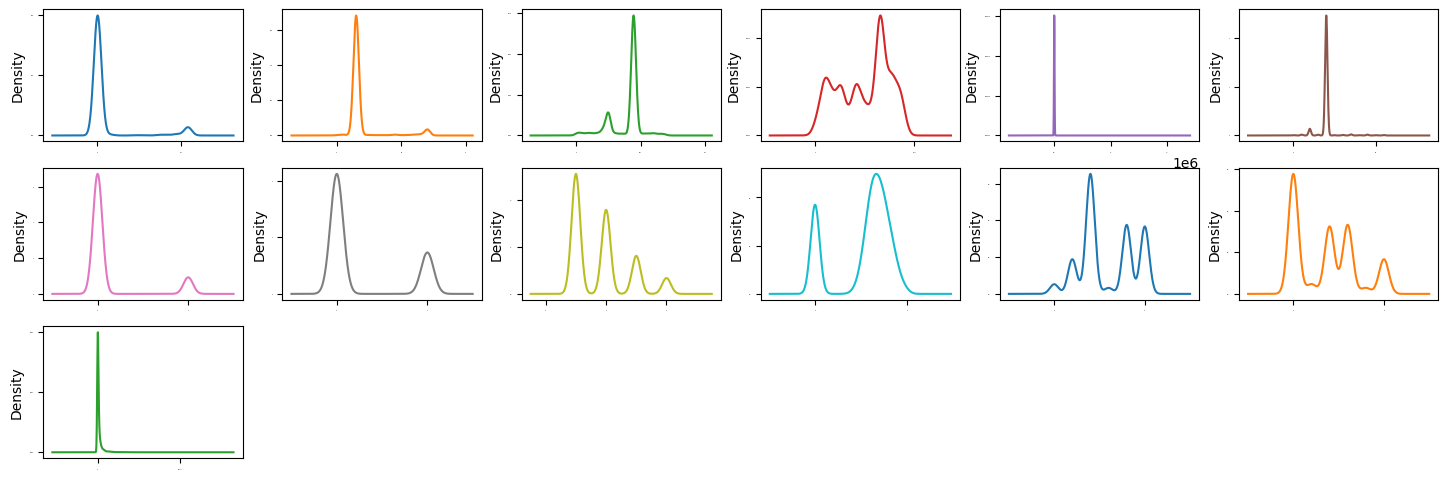

In [76]:
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

In [77]:
df.columns


Index(['Country Code', 'Country', 'City', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

# Part1:Average Cost for two

# Spliting Target and Variable Data

In [78]:
# Splitting the dataset into independent and target variables:
x = df_new.drop("Average Cost for two", axis=1)
y = df_new["Average Cost for two"]


# Remove Skewness

Power Transform

In [79]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

x

array([[-0.10164307, -0.02648945, -2.35595391, ...,  1.33899345,
         0.48596701,  1.27488624],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.58398688],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.56771096],
       ...,
       [ 9.83834862, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.15122356],
       [ 9.83834862, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.26456765],
       [ 9.83834862, 13.68640803,  3.00171525, ..., -0.73234547,
        -1.10085956,  0.23457461]])

Standard Scaler

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.10164307, -0.02648945, -2.35595391, ...,  1.33899345,
         0.48596701,  1.27488624],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.58398688],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.56771096],
       ...,
       [ 9.83834861, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.15122356],
       [ 9.83834861, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.26456765],
       [ 9.83834861, 13.68640803,  3.00171525, ..., -0.73234547,
        -1.10085956,  0.23457461]])

# Data preprocessing:

In [81]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# RandomForestRegressor

In [82]:
# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  

# Train the model on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.8546
MAE: 111.0896
MSE: 45906.1772
RMSE: 214.2573


# LinearRegression

In [83]:
# Initialize the Linear Regressor model
LR = LinearRegression()  

# Train the model on the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
y_pred = LR.predict(x_test)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.6424
MAE: 192.8335
MSE: 112870.9762
RMSE: 335.9628


# GradientBoostingRegressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
#Initialize the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Train the model on the training data
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.8542
MAE: 117.7338
MSE: 46014.6018
RMSE: 214.5101


# BaggingRegressor

In [85]:
from sklearn.ensemble import BaggingRegressor
# Initialize the Bagging Regressor model
bagging_regressor = BaggingRegressor()

# Train the model on the training data
bagging_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.8507
MAE: 112.9704
MSE: 47126.9379
RMSE: 217.0874


# DecisionTreeRegressor

In [86]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train,y_train)

y_pred = dtr.predict(x_test)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.7792
MAE: 131.4904
MSE: 69684.5676
RMSE: 263.9783


# SVM

In [87]:
from sklearn.svm import SVR

# Initialize the Support Vector Machine Regressor model
svm_regressor = SVR(kernel='linear')

# Train the model on the training data
svm_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R2 Score: 0.5851
MAE: 168.9074
MSE: 130975.0104
RMSE: 361.9047


# AdaBoostRegressor

In [88]:
from sklearn.ensemble import AdaBoostRegressor


# Initialize the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2 Score: 0.7820
MAE: 148.3671
MSE: 68825.3622
RMSE: 262.3459


Based on the R2 Score and the other metrics, the Random Forest model seems to be performing the best . It has a high R2 Score, low MAE, low MSE, and low RMSE, indicating good predictive performance. 

# Hyper parameter Tuning

In [89]:
rf_model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5,  n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
R2 Score: 0.8559
MAE: 112.7031
MSE: 45488.7370
RMSE: 213.2809


accuracy after hyperparameter is 85%

# Save the Model

In [90]:
# Saving the model using .pkl
import joblib
joblib.dump(best_rf_model,"Average_Cost_for_tworegressor.pkl")

['Average_Cost_for_tworegressor.pkl']

# Conclusion

In [91]:
best_rf_model = RandomForestRegressor()

# Train the model on the training data
best_rf_model.fit(x_train, y_train)
# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)
a = np.array(y_test)
predicted = np.array(best_rf_model.predict(x_test))
df_concluded = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_concluded

,Original,Predicted
0,350,352.500000
1,20,26.800000
2,200,217.500000
3,150,319.500000
4,500,583.666667
...,...,...
1697,1500,1348.000000
1698,1200,1188.000000
1699,500,500.500000
1700,1100,1215.500000


# Visualization

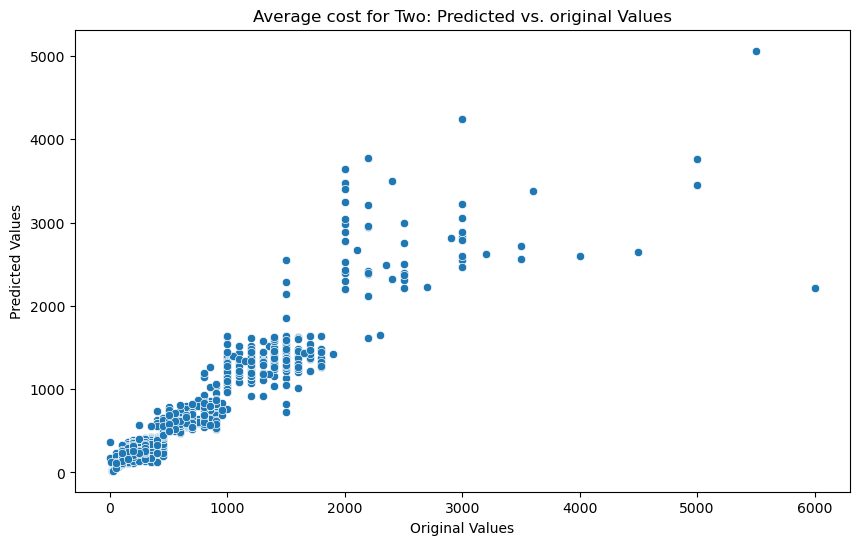

In [92]:
# Scatter plot for predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Average cost for Two: Predicted vs. original Values')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

# Part2:Price range

In [93]:
x1= df_new.drop("Price range", axis=1)
y1= df_new["Price range"]

Power Transform

In [94]:
from sklearn.preprocessing import power_transform
x1= power_transform(x1)

x1

array([[-0.10164307, -0.02648945, -2.35595391, ...,  1.33899345,
         0.48596701,  1.27488624],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.58398688],
       [-0.10164307, -0.02648945, -2.35595391, ..., -0.73234547,
        -1.10085956,  0.56771096],
       ...,
       [ 9.83834862, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.15122356],
       [ 9.83834862, 13.68640803,  3.00171525, ...,  1.33899345,
         0.48596701,  0.26456765],
       [ 9.83834862, 13.68640803,  3.00171525, ..., -0.73234547,
        -1.10085956,  0.23457461]])

Standard Scaler

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1))
x1.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.101643,-0.026489,-2.355954,0.658172,0.741542,-0.000936,-0.375422,-0.618842,0.759169,1.338993,0.485967,1.274886
1,-0.101643,-0.026489,-2.355954,0.094425,0.823175,-0.000936,-0.375422,-0.618842,0.485894,-0.732345,-1.100860,0.583987
2,-0.101643,-0.026489,-2.355954,0.640705,0.359115,-0.000936,-0.375422,-0.618842,0.485894,-0.732345,-1.100860,0.567711
3,-0.101643,-0.026489,-2.355954,1.199101,0.563020,-0.000936,-0.375422,-0.618842,0.310772,-0.732345,-1.100860,-0.042816
4,-0.101643,-0.026489,-2.355954,1.075861,-0.335733,-0.000936,-0.375422,-0.618842,0.575583,-0.732345,-1.100860,0.404768


# check data balance or imbalance

In [96]:
y1.value_counts()


1    4283
2    2816
3    1024
4     385
Name: Price range, dtype: int64

Data is imbalance

# Oversampling

In [97]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x1,y1)

In [98]:
# Checking value count of target column
y1.value_counts()

3    4283
2    4283
4    4283
1    4283
Name: Price range, dtype: int64

<AxesSubplot:xlabel='Price range', ylabel='count'>

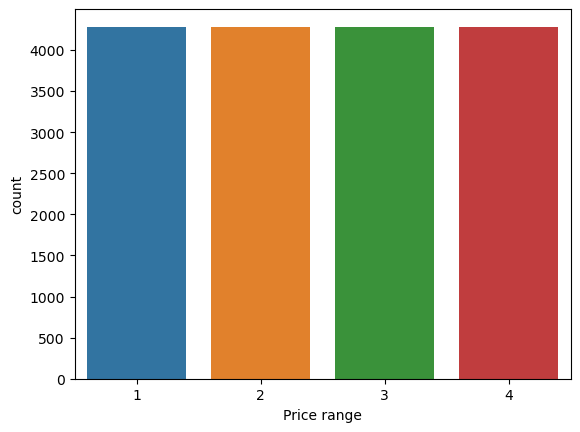

In [99]:
sns.countplot(y1)

Now Data is balanced

# Data Preprocessing

In [100]:
 #Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# LogisticRegression

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
#Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred = logreg_model.predict(x1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred)
classification_rep = classification_report(y1_test, y1_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.95
Confusion Matrix:
[[846   9   0   0]
 [ 12 845  31   0]
 [  0  31 774  61]
 [  0   0  39 779]]
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       855
           2       0.95      0.95      0.95       888
           3       0.92      0.89      0.91       866
           4       0.93      0.95      0.94       818

    accuracy                           0.95      3427
   macro avg       0.95      0.95      0.95      3427
weighted avg       0.95      0.95      0.95      3427



# DecisionTreeClassifier

In [102]:
# Initialize the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_dt = dt_classifier.predict(x1_test)

# Evaluate the model
accuracy_dt = accuracy_score(y1_test, y1_pred_dt)
conf_matrix_dt = confusion_matrix(y1_test, y1_pred_dt)
classification_rep_dt = classification_report(y1_test, y1_pred_dt)

# Print the evaluation metrics for Decision Tree Classifier
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Classifier Confusion Matrix:\n{conf_matrix_dt}")
print(f"Decision Tree Classifier Classification Report:\n{classification_rep_dt}")

Decision Tree Classifier Accuracy: 0.98
Decision Tree Classifier Confusion Matrix:
[[852   3   0   0]
 [  7 872   8   1]
 [  0  11 841  14]
 [  0   0  12 806]]
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       855
           2       0.98      0.98      0.98       888
           3       0.98      0.97      0.97       866
           4       0.98      0.99      0.98       818

    accuracy                           0.98      3427
   macro avg       0.98      0.98      0.98      3427
weighted avg       0.98      0.98      0.98      3427



# KNeighborsClassifier

In [103]:
# Initialize the KNN Classifier model (you can set the number of neighbors with the `n_neighbors` parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_classifier.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_knn = knn_classifier.predict(x1_test)

# Evaluate the model
accuracy_knn = accuracy_score(y1_test, y1_pred_knn)
conf_matrix_knn = confusion_matrix(y1_test, y1_pred_knn)
classification_rep_knn = classification_report(y1_test, y1_pred_knn)

# Print the evaluation metrics for KNN Classifier
print(f"KNN Classifier Accuracy: {accuracy_knn:.2f}")
print(f"KNN Classifier Confusion Matrix:\n{conf_matrix_knn}")
print(f"KNN Classifier Classification Report:\n{classification_rep_knn}")

KNN Classifier Accuracy: 0.95
KNN Classifier Confusion Matrix:
[[802  51   1   1]
 [ 16 811  58   3]
 [  0   9 836  21]
 [  0   0   7 811]]
KNN Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       855
           2       0.93      0.91      0.92       888
           3       0.93      0.97      0.95       866
           4       0.97      0.99      0.98       818

    accuracy                           0.95      3427
   macro avg       0.95      0.95      0.95      3427
weighted avg       0.95      0.95      0.95      3427



# RandomForestClassifier

In [104]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_rf = rf_classifier.predict(x1_test)

# Evaluate the model
accuracy_rf = accuracy_score(y1_test, y1_pred_rf)
conf_matrix_rf = confusion_matrix(y1_test, y1_pred_rf)
classification_rep_rf = classification_report(y1_test, y1_pred_rf)

# Print the evaluation metrics for Random Forest Classifier
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Classifier Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classifier Classification Report:\n{classification_rep_rf}")

Random Forest Classifier Accuracy: 0.99
Random Forest Classifier Confusion Matrix:
[[852   1   2   0]
 [  8 874   6   0]
 [  0   6 854   6]
 [  0   0   0 818]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       855
           2       0.99      0.98      0.99       888
           3       0.99      0.99      0.99       866
           4       0.99      1.00      1.00       818

    accuracy                           0.99      3427
   macro avg       0.99      0.99      0.99      3427
weighted avg       0.99      0.99      0.99      3427



# AdaBoostClassifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
#Initialize the AdaBoost Classifier model
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_classifier.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_adaboost = adaboost_classifier.predict(x1_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y1_test, y1_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y1_test, y1_pred_adaboost)
classification_rep_adaboost = classification_report(y1_test, y1_pred_adaboost)

# Print the evaluation metrics for AdaBoost Classifier
print(f"AdaBoost Classifier Accuracy: {accuracy_adaboost:.2f}")
print(f"AdaBoost Classifier Confusion Matrix:\n{conf_matrix_adaboost}")
print(f"AdaBoost Classifier Classification Report:\n{classification_rep_adaboost}")

AdaBoost Classifier Accuracy: 0.67
AdaBoost Classifier Confusion Matrix:
[[615 240   0   0]
 [  0 885   3   0]
 [  0  77 789   0]
 [  0   0 800  18]]
AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.72      0.84       855
           2       0.74      1.00      0.85       888
           3       0.50      0.91      0.64       866
           4       1.00      0.02      0.04       818

    accuracy                           0.67      3427
   macro avg       0.81      0.66      0.59      3427
weighted avg       0.80      0.67      0.60      3427



# SVC

In [106]:
from sklearn.svm import SVC
# Initialize the Support Vector Machine (SVM) Classifier model
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_classifier.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_svm = svm_classifier.predict(x1_test)

# Evaluate the model
accuracy_svm = accuracy_score(y1_test, y1_pred_svm)
conf_matrix_svm = confusion_matrix(y1_test, y1_pred_svm)
classification_rep_svm = classification_report(y1_test, y1_pred_svm)

# Print the evaluation metrics for SVM Classifier
print(f"SVM Classifier Accuracy: {accuracy_svm:.2f}")
print(f"SVM Classifier Confusion Matrix:\n{conf_matrix_svm}")
print(f"SVM Classifier Classification Report:\n{classification_rep_svm}")

SVM Classifier Accuracy: 0.95
SVM Classifier Confusion Matrix:
[[854   1   0   0]
 [ 16 845  27   0]
 [  0  34 772  60]
 [  0   0  36 782]]
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       855
           2       0.96      0.95      0.96       888
           3       0.92      0.89      0.91       866
           4       0.93      0.96      0.94       818

    accuracy                           0.95      3427
   macro avg       0.95      0.95      0.95      3427
weighted avg       0.95      0.95      0.95      3427



# Cross validation score

In [119]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    AdaBoostClassifier()  # Add parentheses here
]

# Perform cross-validation for each classifier
for classifier in classifiers:
    cv_scores = cross_val_score(classifier, x1, y1, cv=5, scoring='accuracy')

    # Display the cross-validation scores
    print(f"{classifier.__class__.__name__} Cross-Validation Scores:", cv_scores)
    print(f"{classifier.__class__.__name__} Mean Accuracy:", cv_scores.mean())
    print("\n")

LogisticRegression Cross-Validation Scores: [0.93259411 0.95010213 0.94512551 0.94687682 0.95096322]
LogisticRegression Mean Accuracy: 0.9451323586552378


RandomForestClassifier Cross-Validation Scores: [0.80040852 0.99503939 0.99328663 0.97898424 0.98861646]
RandomForestClassifier Mean Accuracy: 0.9512670491585741


DecisionTreeClassifier Cross-Validation Scores: [0.78932011 0.98978699 0.98686515 0.96876824 0.98190309]
DecisionTreeClassifier Mean Accuracy: 0.9433287152895067


KNeighborsClassifier Cross-Validation Scores: [0.76364167 0.95126933 0.96614127 0.95504962 0.96234676]
KNeighborsClassifier Mean Accuracy: 0.9196897308230663


SVC Cross-Validation Scores: [0.91070907 0.95564634 0.95475773 0.94249854 0.95271454]
SVC Mean Accuracy: 0.9432652448678984


AdaBoostClassifier Cross-Validation Scores: [0.73708783 0.53428655 0.52393462 0.61500292 0.51751313]
AdaBoostClassifier Mean Accuracy: 0.5855650102521935




difference between Model Accuracy and cross validation score

In [120]:
import pandas as pd

# Accuracy and cross-validation scores
scores_data = {
    'Logistic Regression': {'Accuracy': 0.95, 'Cross-Validation Mean': 0.9451323586552378},
    'Random Forest Classifier': {'Accuracy': 0.99, 'Cross-Validation Mean':0.9512670491585741},
    'Decision Tree Classifier': {'Accuracy': 0.98, 'Cross-Validation Mean': 0.9433287152895067},
    'K-Nearest Neighbors (KNN)': {'Accuracy': 0.95, 'Cross-Validation Mean': 0.9196897308230663},
    'Support Vector Classifier (SVC)': {'Accuracy': 0.95, 'Cross-Validation Mean': 0.9432652448678984},
    'AdaBoostClassifier(ADB)': {'Accuracy': 0.67, 'Cross-Validation Mean': 0.5855650102521935}
}

# Create a DataFrame
model_performance_df = pd.DataFrame(scores_data).T.reset_index()
model_performance_df.columns = ['Model', 'Accuracy', 'Cross-Validation Mean']

# Calculate and add the score differences
model_performance_df['Score Difference'] = model_performance_df['Accuracy'] - model_performance_df['Cross-Validation Mean']

# Display the DataFrame
print(model_performance_df)


                             Model  Accuracy  Cross-Validation Mean  \
0              Logistic Regression      0.95               0.945132   
1         Random Forest Classifier      0.99               0.951267   
2         Decision Tree Classifier      0.98               0.943329   
3        K-Nearest Neighbors (KNN)      0.95               0.919690   
4  Support Vector Classifier (SVC)      0.95               0.943265   
5          AdaBoostClassifier(ADB)      0.67               0.585565   

   Score Difference  
0          0.004868  
1          0.038733  
2          0.036671  
3          0.030310  
4          0.006735  
5          0.084435  


all three models (Random Forest, Decision Tree, and SVC) seem to perform well. The Random Forest model stands out with the highest accuracy and a small score difference, suggesting robust generalization

Here we proceed with Random forest classifier

# Hyperparameter Tuning

In [121]:
#  hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x1_train, y1_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x1_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [122]:
# Print the accuracy
print(f"Accuracy of the Best Random Forest Model: {accuracy:.2f}")

Accuracy of the Best Random Forest Model: 0.95


he model correctly predicts the target variable for 95%

# Save the Model

In [123]:
# Saving the model using .pkl
import joblib
joblib.dump(best_rf_model,"Price_rangeClassification.pkl")

['Price_rangeClassification.pkl']

# Conclusion

In [124]:
best_rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
best_rf_model.fit(x1_train, y1_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(x1_test)
a = np.array(y1_test)
predicted = np.array(best_rf_model.predict(x1_test))
df_concluded = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_concluded

,Original,Predicted
0,1,1
1,4,4
2,4,4
3,4,4
4,2,2
...,...,...
3422,3,3
3423,1,1
3424,3,3
3425,1,1


# Visualization

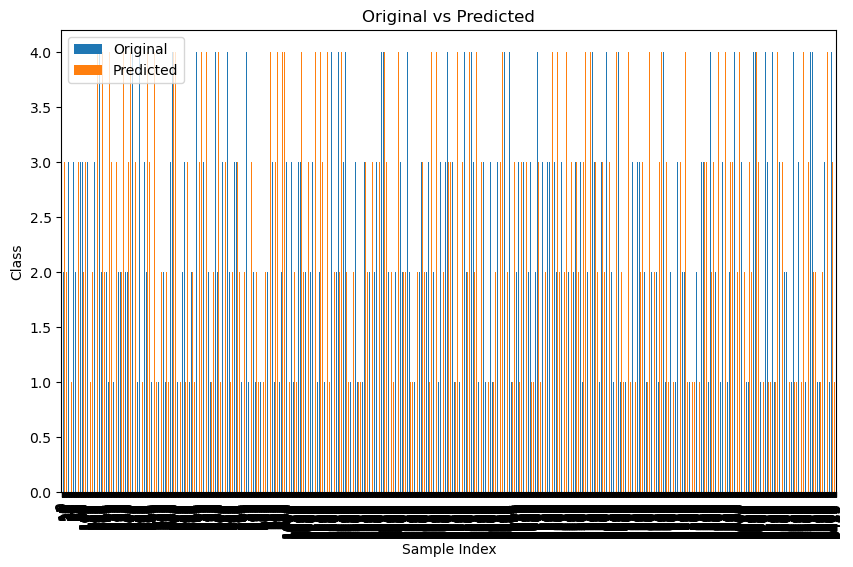

In [125]:
df_concluded = pd.DataFrame({"Original": a, "Predicted": predicted}, index=range(len(a)))

# Plotting
df_concluded.plot(kind='bar', figsize=(10, 6))
plt.title('Original vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.show()